In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pulser.devices import Chadoq2
from pulser import Pulse, Sequence, Register

from src.mapping import create_coordinates
from src.qubo_tools import build_qubo_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Encoding into a neutral atoms device tests

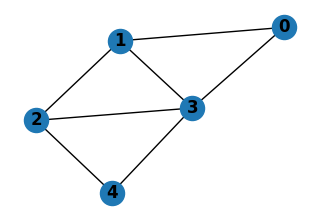

In [32]:
Graph_Example_encoding  = nx.Graph()
Graph_Example_encoding .add_edges_from([[0,1],[1,2], [1,3], [0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_encoding ,with_labels=True,font_weight='bold')

In [23]:
nx.adjacency_matrix(Graph_Example_encoding).todense()

array([[0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0]])

In [4]:
Q_example_encoding = build_qubo_matrix(Graph_Example_encoding)
Q_example_encoding

array([[-2.,  2.,  0.,  2.,  0.],
       [ 0., -3.,  2.,  2.,  0.],
       [ 0.,  0., -3.,  2.,  2.],
       [ 0.,  0.,  0., -4.,  2.],
       [ 0.,  0.,  0.,  0., -2.]])

The *create_coordinates* function needs the following parameters:

- **qubo_matrix**:QUBO matrix representing the problem
- **optimizer**:Minimizer to use from scipy. Default COBYLA
- **scale_factor**: Factor to scale the QUBO matrix. Default 3

In [5]:
coords_example = create_coordinates(Q_example_encoding)
coords_example

array([[ 5.24411836, 12.9150815 ],
       [ 8.71185464,  2.43707612],
       [ 1.37077413, -5.80555067],
       [-2.09555962,  4.67203285],
       [-9.43722001, -3.56925211]])

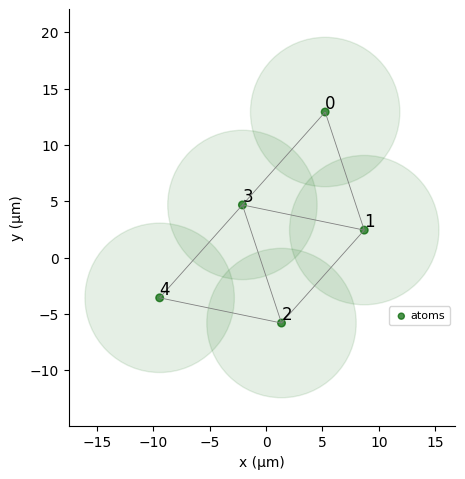

In [9]:
qubits_example = dict(enumerate(coords_example))
reg_example = Register(qubits_example)
reg_example.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

# Example 1: Triangular graph

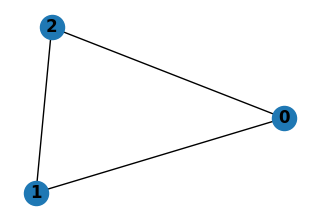

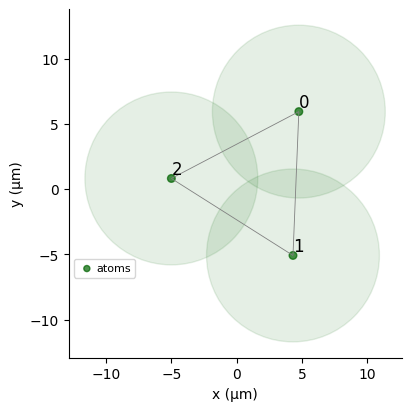

In [17]:
Graph_triangular = nx.Graph()
Graph_triangular.add_edges_from([[0,1],[1,2],[0,2]])
plt.figure(figsize=(3,2)) 
nx.draw(Graph_triangular,with_labels=True,font_weight='bold')

Q_triangular = build_qubo_matrix(Graph_triangular)
coords_triangular = create_coordinates(Q_triangular)

qubits_tiangular = dict(enumerate(coords_triangular))
reg_triangular = Register(qubits_tiangular)
reg_triangular.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

## Example 2: Square graph with optimizer = 'Nelder-Mead' 

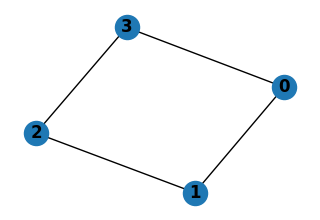

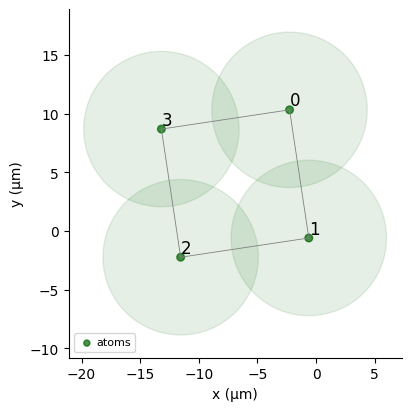

In [20]:
Graph_square= nx.Graph()
Graph_square.add_edges_from([[0,1],[0,3],[1,2],[2,3]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_square,with_labels=True,font_weight='bold')

Q_square = build_qubo_matrix(Graph_square)
coords_square = create_coordinates(Q_square, 
                                   optimizer = 'Nelder-Mead' )

qubits_square = dict(enumerate(coords_square))
reg_square = Register(qubits_square)
reg_square.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

## Example 3

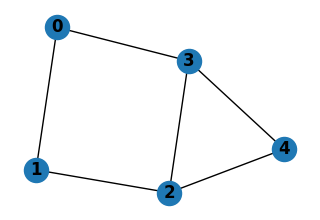

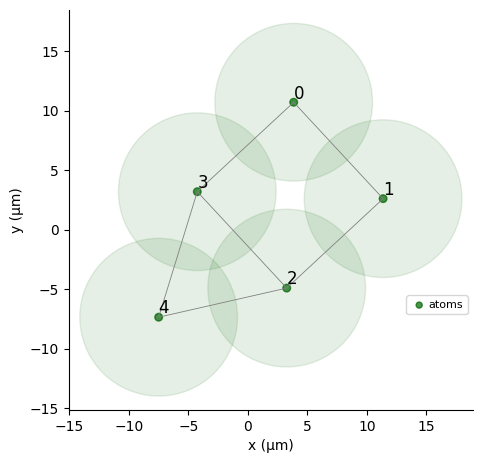

In [35]:
Graph_Example_3 = nx.Graph()
Graph_Example_3.add_edges_from([[0,1],[1,2],[0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_3,with_labels=True,font_weight='bold')

Q_example_3 = build_qubo_matrix(Graph_Example_3 )
coords_example_3 = create_coordinates(Q_example_3)

qubits_example_3 = dict(enumerate(coords_example_3))
reg_example_3 = Register(qubits_example_3)
reg_example_3.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

## Example 4: Bull graph with optimizer ='Nelder-Mead'

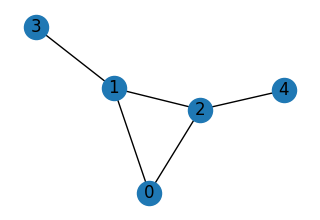

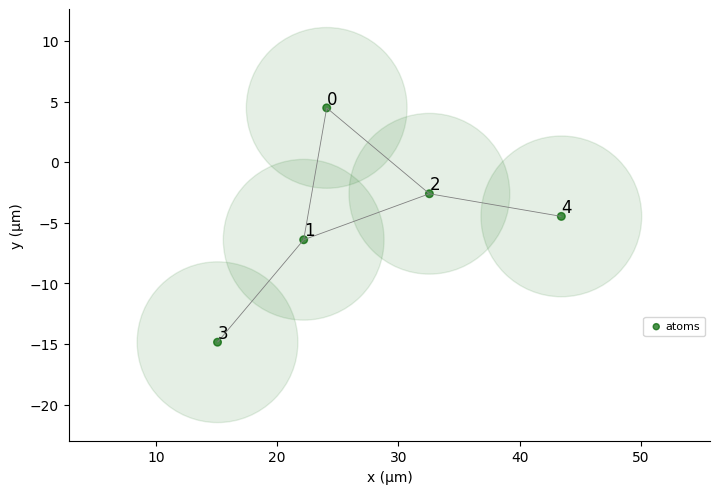

In [39]:
bull_graph = nx.bull_graph()

plt.figure(figsize=(3,2)) 
nx.draw(bull_graph,with_labels=True)

Q_bull = build_qubo_matrix(bull_graph)
coords_bull = create_coordinates(Q_bull,
                                optimizer ='Nelder-Mead')

qubits_bull = dict(enumerate(coords_bull))
reg_bull = Register(qubits_bull)
reg_bull.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

## Example 5: Encoding doesn't work 

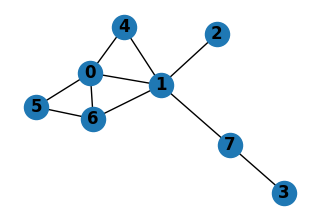

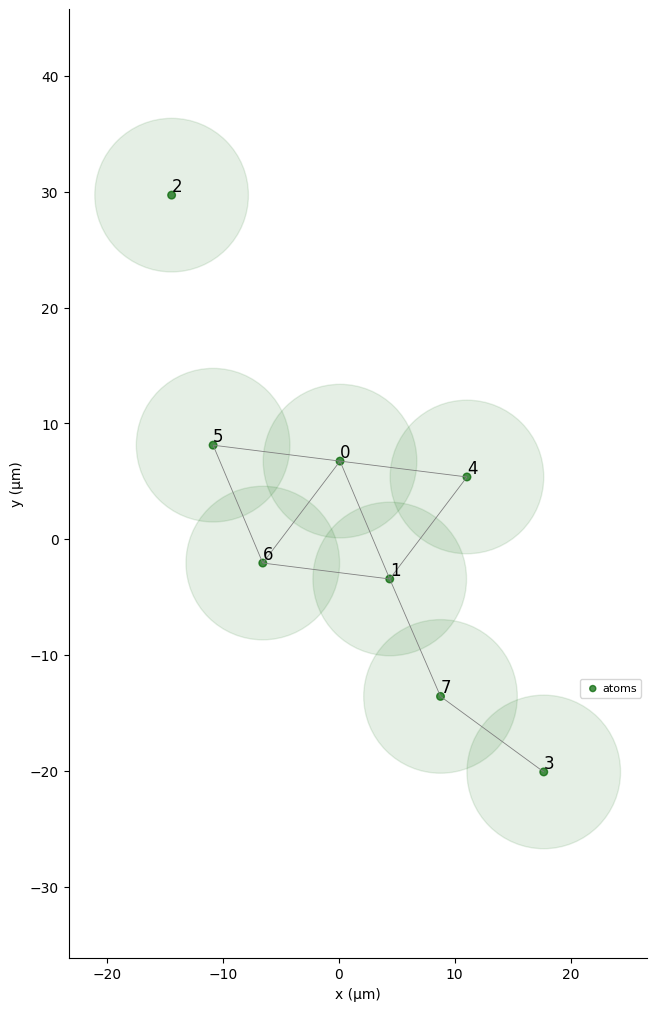

In [46]:
Graph_Example_5 = nx.Graph()
Graph_Example_5.add_edges_from([[0, 1],[6, 1],[2, 1],[6, 5],[4, 1],[0, 4], [1, 7], [0, 6], [5, 0],[7, 3]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_5,with_labels=True,font_weight='bold')

Q_Example_5 = build_qubo_matrix(Graph_Example_5)
coords_Example_5 = create_coordinates(Q_Example_5)#optimizer ='Nelder-Mead'

qubits_Example_5 = dict(enumerate(coords_Example_5))
reg_Example_5 = Register(qubits_Example_5)
reg_Example_5.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

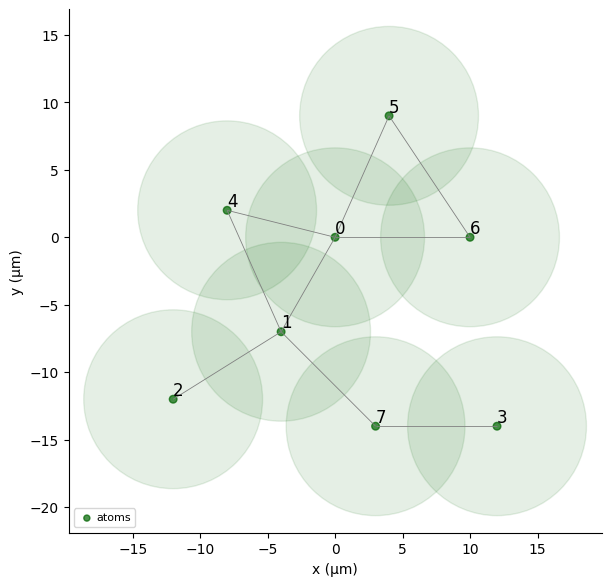

In [47]:
qubits_5 = {"0": (0, 0),"1": (-4, -7),"2": (-12, -12), "3": (12, -14), "4": (-8, 2),
            "5": (4, 9),"6": (10, 0),"7": (3, -14),}
reg_by_hand_5 = Register(qubits_5)
reg_by_hand_5.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)